group                                 -0.806391
OverlapPROmeanPrimaryAmplitude_ang    -0.046785
overlapPROmeanPrimaryLatency          -0.032462
OverlapPROmeanAvgVelocity              0.112776
GAP1PROmeanError                      -0.323584
overlapptoImeanFirstGain               0.281079
Gap1ANTImeanAcuracy                    0.349899
OverlapPROmeanPeakVelocity            -0.023636
overlapPROmeannotCorrected            -0.523157
overlapPROmeannoRrespond              -0.358245
OverlapANTImeanPrimaryAmplitude_ang   -0.063179
overlapANTImeanPrimaryLatency         -0.565177
OverlapANtimeanAvgVelocity             0.091633
GAP1ANTImeanError                     -0.388877
overlapANTimeanFirstGain               0.460350
GAPPROmeanAcuracy                      0.300443
OverlapANTImeanPeakVelocity           -0.045926
overlapANTImeannotCorrected           -0.559490
OverlapANTImeannoRrespond             -0.656074
GapPROmeanPrimaryAmplitude_ang         0.083611
GapPROmeanPrimaryLatency              -0

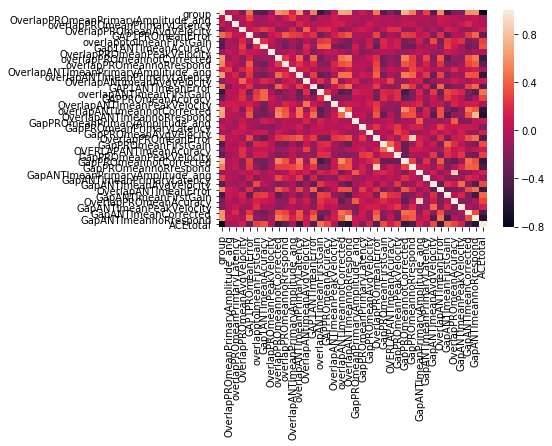

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

missing_value=["?", " "]
data1= pd.read_csv("data/pencile.csv",na_values=missing_value, delimiter=",")
data1.dropna(inplace = True)
data= pd.read_csv("data/eye-tracking.csv",na_values=missing_value, delimiter=",")
data.dropna(inplace = True)
data['ACEtotal'] = data1['ACEtotal']
Var_Corr = data.corr()

# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
print(Var_Corr['ACEtotal'])
print(np.sort(Var_Corr['ACEtotal']))

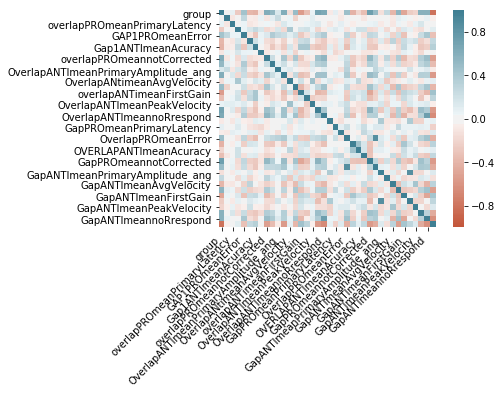

In [20]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
corr.style.background_gradient(cmap='coolwarm')

,group,OverlapPROmeanPrimaryAmplitude_ang,overlapPROmeanPrimaryLatency,OverlapPROmeanAvgVelocity,GAP1PROmeanError,overlapptoImeanFirstGain,Gap1ANTImeanAcuracy,OverlapPROmeanPeakVelocity,overlapPROmeannotCorrected,overlapPROmeannoRrespond,OverlapANTImeanPrimaryAmplitude_ang,overlapANTImeanPrimaryLatency,OverlapANtimeanAvgVelocity,GAP1ANTImeanError,overlapANTimeanFirstGain,GAPPROmeanAcuracy,OverlapANTImeanPeakVelocity,overlapANTImeannotCorrected,OverlapANTImeannoRrespond,GapPROmeanPrimaryAmplitude_ang,GapPROmeanPrimaryLatency,GapPROmeanAvgVelocity,OverlapPROmeanError,GapPROmeanFirstGain,OVERLAPANTImeanAcuracy,GapPROmeanPeakVelocity,GapPROmeannotCorrected,GapPROmeannoRrespond,GapANTImeanPrimaryAmplitude_ang,GapANTImeanPrimaryLatency,GapANTImeanAvgVelocity,OverlapANTImeanError,GapANTImeanFirstGain,OverlapPROmeanAcuracy,GapANTImeanPeakVelocity,GapANTImeanCorrected,GapANTImeannoRrespond,ACEtotal
group,1,0.022318,0.0775119,-0.260601,0.44527,-0.379233,-0.406229,-0.0969013,0.609557,0.531471,0.148565,0.623846,-0.147944,0.506785,-0.553606,-0.342898,0.0671111,0.69781,0.650491,-0.0779697,0.0951497,-0.0568365,0.475003,-0.415378,-0.199703,-0.34925,0.731947,0.500366,-0.124032,0.280463,-0.394568,0.560778,-0.499103,-0.25242,-0.208608,0.59179,0.592707,-0.806391
OverlapPROmeanPrimaryAmplitude_ang,0.022318,1,-0.0940796,0.0157013,0.284634,-0.0557831,-0.077489,0.0686212,-0.0978252,0.0899107,0.256742,0.000995484,0.0507395,-0.218681,0.0336425,-0.0134546,0.103864,0.00645294,0.0368224,0.00725547,-0.0344703,-0.0827533,0.0310987,-0.0154986,0.00492867,-0.0974923,-0.00905145,-0.0230777,-0.00883585,-0.00794248,-0.0814017,0.0922932,0.0550317,0.0219188,-0.0402394,0.024772,0.0758081,-0.0467848
overlapPROmeanPrimaryLatency,0.0775119,-0.0940796,1,-0.0309223,0.0544909,-0.0943077,-0.0475666,-0.0296227,0.043558,-0.00439644,-0.0903981,0.154187,0.0559135,0.0118753,0.0199796,0.0476896,0.103546,0.121792,0.000686064,-0.0860082,-0.0371808,0.0952576,0.0259652,-0.0494041,0.00974914,-0.011643,0.0502565,0.0806849,-0.0755357,-0.0209389,-0.0896361,0.0499373,0.0364383,-0.0748317,0.0772118,0.170026,0.0299135,-0.0324617
OverlapPROmeanAvgVelocity,-0.260601,0.0157013,-0.0309223,1,0.0576145,0.1627,0.265028,0.161136,-0.174943,-0.109936,0.165647,-0.176202,0.404366,0.0145305,0.183417,0.204016,0.0675385,-0.201403,-0.068873,0.0784904,0.12232,0.0485252,-0.115265,0.0525046,0.202786,0.203562,-0.160384,-0.139552,0.0720522,-0.15696,0.0150525,-0.161205,0.144016,0.0819885,-0.095636,-0.140732,-0.0143936,0.112776
GAP1PROmeanError,0.44527,0.284634,0.0544909,0.0576145,1,-0.107228,-0.29472,0.0678539,0.144203,0.373957,0.269876,0.242073,0.104985,0.216342,-0.270589,-0.126962,0.117602,0.268653,0.3683,-0.0430639,-0.0194729,-0.023232,0.296486,-0.231057,-0.0057513,-0.119095,0.281683,0.245723,0.0335253,0.102023,-0.211856,0.214098,-0.31378,-0.0260612,-0.0391374,0.243886,0.413795,-0.323584
overlapptoImeanFirstGain,-0.379233,-0.0557831,-0.0943077,0.1627,-0.107228,1,0.197399,0.0613134,-0.153349,-0.201068,-0.060248,-0.218682,-0.00296313,-0.151971,0.233113,0.277799,-0.0169696,-0.175763,-0.261201,-0.0745608,-0.109755,0.0896026,-0.231356,0.174499,0.0295843,0.109443,-0.238146,-0.166312,0.1179,-0.191699,0.310698,-0.234996,0.249076,0.141223,0.212111,-0.228067,-0.146746,0.281079
Gap1ANTImeanAcuracy,-0.406229,-0.077489,-0.0475666,0.265028,-0.29472,0.197399,1,-0.0119066,-0.107675,-0.282454,-0.124846,-0.271379,0.175436,-0.110227,0.411239,0.41697,-0.238599,-0.301344,-0.26224,0.116628,-0.146296,0.110367,-0.340159,0.149133,0.0576742,0.117504,-0.273957,-0.283539,-0.0430928,-0.0654321,0.0295597,-0.169541,0.272153,0.0829563,-0.0408108,-0.281957,-0.24152,0.349899
OverlapPROmeanPeakVelocity,-0.0969013,0.0686212,-0.0296227,0.161136,0.0678539,0.0613134,-0.0119066,1,-0.0813973,-0.0233993,0.0576592,-0.111861,0.105214,-0.209409,-0.0306039,0.0665243,0.0333999,-0.0430342,-0.149618,0.0713855,-0.185523,-0.11179,-0.0279732,0.0163416,0.0111215,-0.101915,-0.10532,-0.0507024,0.0488597,-0.0133389,-0.103533,-0.118112,0.0892975,0.0415781,-0.05086

In [22]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [32]:
def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

# A = np.array([[ 2.0,  140.0,  128.23, -150.5, -5.4  ],
#               [ 2.4,  153.11, 130.34, -130.1, -9.5  ],
#               [ 1.2,  156.9,  120.11, -110.45,-1.12 ]])

A = data.values[:,1:].astype(float)

bins = data.shape # ?
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
matMI = pd.DataFrame(matMI)
matMI.columns = (data.columns.values[1:])
print(matMI)
# matMI.style.background_gradient(cmap='coolwarm')        


    group  OverlapPROmeanPrimaryAmplitude_ang  overlapPROmeanPrimaryLatency  \
0     0.0                            0.330645                      0.319656   
1     0.0                            0.000000                      2.622583   
2     0.0                            0.000000                      0.000000   
3     0.0                            0.000000                      0.000000   
4     0.0                            0.000000                      0.000000   
5     0.0                            0.000000                      0.000000   
6     0.0                            0.000000                      0.000000   
7     0.0                            0.000000                      0.000000   
8     0.0                            0.000000                      0.000000   
9     0.0                            0.000000                      0.000000   
10    0.0                            0.000000                      0.000000   
11    0.0                            0.000000       

In [38]:
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = normalized_mutual_info_score(A[:,ix], A[:,jx])
matMI = pd.DataFrame(matMI)
matMI.columns = (data.columns.values[1:])
print(matMI)
# matMI.style.background_gradient(cmap='coolwarm')        


    group  OverlapPROmeanPrimaryAmplitude_ang  overlapPROmeanPrimaryLatency  \
0     0.0                            0.466723                      0.474889   
1     0.0                            0.000000                      0.989862   
2     0.0                            0.000000                      0.000000   
3     0.0                            0.000000                      0.000000   
4     0.0                            0.000000                      0.000000   
5     0.0                            0.000000                      0.000000   
6     0.0                            0.000000                      0.000000   
7     0.0                            0.000000                      0.000000   
8     0.0                            0.000000                      0.000000   
9     0.0                            0.000000                      0.000000   
10    0.0                            0.000000                      0.000000   
11    0.0                            0.000000       